In [1]:
%pylab inline

from IPython.display import display, HTML, Image, clear_output
from matplotlib.collections import PatchCollection
from scipy.stats import norm
import time

Populating the interactive namespace from numpy and matplotlib



<center> <h1> STOCHASTIC SAMPLING </h1> 
<h3>Or</h3>
 <h3>Monte Carlo Methods </h3> </center>

<div style="text-align: right;">André van Schaik<br>April 2015</div>

This notebook was created by me to try and understand this material better and play with some of the concepts introduced below by running the code with different settings. Feel free to use this, but I don't know that everything that follows is without mistakes. Please let me know if you find any.

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [43]:
display(HTML(open('Notebook.css').read()))  #load the CCS style sheet
reset = True  #reset animations to their starting point

# Integral of a function

Say we are interested in estimating the integral of a function we cannot analytically calculate.

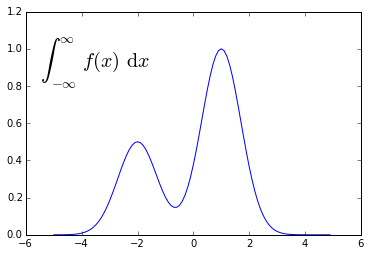

In [5]:
def f(x):
    return exp(-(x-1)**2) + exp(-(x+2)**2)/2.0    

points = 100
x = linspace(-5,5,points,endpoint=False)
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))
t=ax.text(-5.5,.9,r"$\int_{-\infty}^\infty f(x) \, \mathrm{d}x$",fontsize=20)


A standard approach would be to sample the function at regular intervals and sum the appropriately weighted samples.

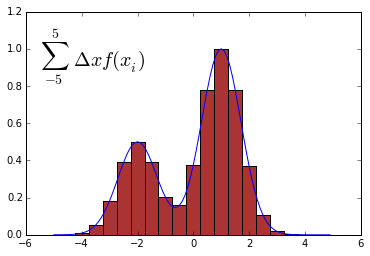

Value of Integral =  2.65868077636
Approximation =  2.65867949446


In [7]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))
ax.text(-5.5,.9,r"$\sum_{-5}^5 \,\Delta x f(x_i)$",fontsize=20)
samples = 20
width = 10.0/samples
s = linspace(-5,5,samples,endpoint=False)
for i in s:
    ax.add_patch(
        Rectangle(
            (i-width/2.0, 0.0),                  # (x,y)
            width,                               # width
            f(i),                                # height
            facecolor="#aa3333"
        )
    )
display(fig)
print "Value of Integral = ", 1.5*sqrt(pi)
print "Approximation = ", sum(f(s))*10/samples
close()


In [8]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

The weights of each bin are equal and are given by:

$$\sum_{-5}^5 \Delta x \, f(x) = \frac{\mathrm{range}}{\mathrm{num\_bins}}\sum_{-5}^5 f(x)$$ 

# Random (Uniform) Sampling
Instead of regular sampling, you can also pick your sample points uniformly distributed across the range of interest.

(*Note, if you are running this notebook in iPython you should select "Cell -> Run All" from the menu above to re-execute all the code. Once that is done, you can then select any of the figures and hit CTRL-Return to re-run the code, such as the figure below, or click on the "toggle code" link below the figures and modify any of the code if you want.*)

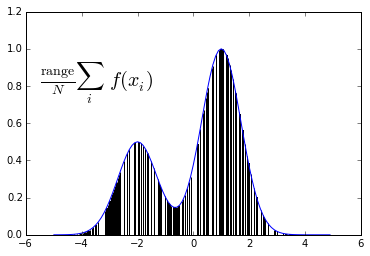

N = number of samples =  200
Value of Integral =  2.65868077636
Approximation =  2.69948644215


In [9]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))
ax.text(-5.5,.8,r"$\frac{\mathrm{range}}{N} \sum_i \,f(x_i)$",fontsize=20)
samples = 200
width = 1.0/samples
s = random.uniform(-5,5,samples)
for i in s:
    ax.add_patch(
        Rectangle(
            (i-width/2.0, 0.0),                  # (x,y)
            width,                               # width
            f(i),                                # height
            facecolor="#aa3333"
        )
    )
display(fig)
print "N = number of samples = ", samples
print "Value of Integral = ", 1.5*sqrt(pi)
print "Approximation = ", sum(f(s))*10/samples
close()

In [10]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

### Note on the relation between discrete sampling and continuous distributions

If samples $x_i$ are distributed according to a pdf $p(x)$, then, by the definition of Expected Value:

$$\text{E}(f(x)) = \int p(x)\,f(x)\,\mathrm{d}x \approx \frac{1}{N} \sum_i f(x_i)$$

Thus to evaluate our integral, we have:

$$\frac{\text{range}}{N} \sum_i f(x_i) \approx \text{range}\int_{-5}^5 p(x)\,f(x)\,\mathrm{d}x = \int_{-5}^5 \,f(x)\,\mathrm{d}x$$
$$\text{if} \quad p(x) = \frac{1}{\text{range}}$$

# Problem
Sometimes most samples from a uniform distribution are uninformative, because they sample values of $x$ where $f(x)$ is (nearly) 0.

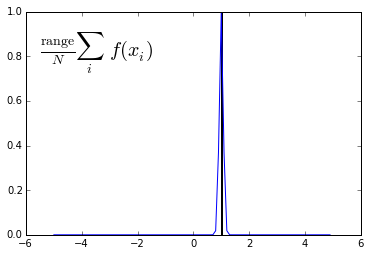

samples = 20
Value of Integral =  0.177245385091
Approximation =  0.130151565383


In [11]:
def g(x):
    return exp(-100*(x-1)**2)     
#    return 1.0*(x>0.5)*(x<=2.5)
    
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,g(x))
ax.text(-5.5,.8,r"$\frac{\mathrm{range}}{N}\sum_i \,f(x_i)$",fontsize=20)
samples = 20
width = 1.0/samples
s = random.uniform(-5,5,samples)
for i in range(samples):
    ax.add_patch(
        Rectangle(
            (i-width/2.0, 0.0),                  # (x,y)
            width,                               # width
            g(i),                                # height
            facecolor="#aa3333"
        )
    )
display(fig)
print "samples =", samples
print "Value of Integral = ", sqrt(pi/100)
print "Approximation = ", sum(g(s))*10/samples
close()


In [12]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

#Solution
Concentrate the samples in the region of interest, and correct the summation. This is called **Importance Sampling** and improves (reduces the variance of) your estimate. In the figure below the samples of $x$ are drawn from a probability distribution proportional to the red curve. You can see that the estimate of the value of the integral is not perfect, but much better than before. If you run the code a few times (select the figure and hit CTRL-Enter), you'll get an idea of the variance fo the approximation.

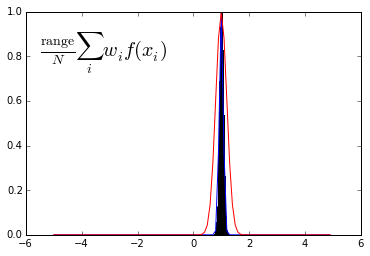

samples = 200
Value of Integral =  0.177245385091
Approximation =  0.180919129341


In [13]:
impsamp = norm(loc=1.0, scale=0.2)
fig = figure()
#figsize(12.5, 10)
ax = fig.add_subplot(111)
ax.plot(x,g(x))
ax.plot(x,impsamp.pdf(x)/2.0,'r')
ax.text(-5.5,.8,r"$\frac{\mathrm{range}}{N}\sum_i w_if(x_i)$",fontsize=20)
samples = 200
width = 1.0/samples
s = impsamp.rvs(size=samples)
for i in s:
    ax.add_patch(
        Rectangle(
            (i-width/2.0, 0.0),                  # (x,y)
            width,                               # width
            g(i),                                # height
            facecolor="#aa3333"
        )
    )
display(fig)
print "samples =", samples
print "Value of Integral = ", sqrt(pi/100)
print "Approximation = ", 1.0/samples*sum(g(s)/impsamp.pdf(s))
close()

In [14]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

### Finding the weights

$$\begin{align*}\int p(x)\,f(x)\,\mathrm{d}x &= \int \frac{p(x)}{q(x)}\,{q(x)}\,f(x)\,\mathrm{d}x \\ &= \int w\,{q(x)}\,f(x)\,\mathrm{d}x \\ &\approx \frac{1}{N} \sum_i w_i\,f(x_i) \quad \text{with: } w_i = \frac{p(x_i)}{q(x_i)} \text{and } x_i \text{ distributed according to } q(x).
\end{align*}$$

Note that for the problem setting above we are interested in the **integral** of $f(x)$, not the **Expected Value**. We get the integral according to: 

$$\begin{align*}
\frac{\text{range}}{N} \sum_i w_i\,f(x_i) &= \frac{\text{range}}{N} \sum_i \frac{p(x_i)}{q(x_i)}\,f(x_i)\\
&= \frac{\text{range}}{N} \sum_i \frac{1/\text{range}}{q(x_i)}\,f(x_i)\\
&= \frac{1}{N} \sum_i \frac{f(x_i)}{q(x_i)}
\end{align*}$$

In other words, you are simply weighting the function values evaluated at samples $x_i$ by how likely the sample $x_i$ is to be picked, given by $q(x_i)$.

#Ideal importance distribution
Ideally you concentrate the samples proportional to the function itself.

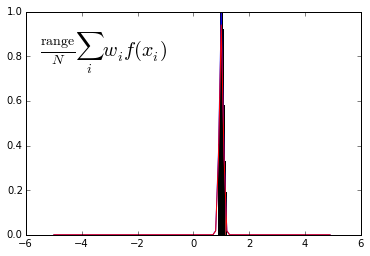

samples = 20
Value of Integral =  0.177245385091
Approximation =  0.177245385091


In [15]:
impsamp = norm(loc=1, scale=sqrt(0.005))
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,g(x))
ax.plot(x,impsamp.pdf(x)/6,'r')
ax.text(-5.5,.8,r"$\frac{\mathrm{range}}{N}\sum_i w_if(x_i)$",fontsize=20)
samples = 20
width = 1.0/samples
s = impsamp.rvs(size=samples)
for i in s:
    ax.add_patch(
        Rectangle(
            (i-width/2.0, 0.0),                  # (x,y)
            width,                               # width
            g(i),                                # height
            facecolor="#aa3333"
        )
    )
display(fig)
print "samples =", samples
print "Value of Integral = ", sqrt(pi/100)
print "Approximation = ", 1.0/samples*sum(g(s)/impsamp.pdf(s))
close()

In [16]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

#But how do you generate samples according to $f(x)$?

One way is to sample all the space and discard the samples above the curve. This is called **rejection sampling**, or **acceptance-rejection sampling**. (To see an animated plot below, you should have executed "Cell -> Run All" above, select the plot below and hit CTRL-Return.)

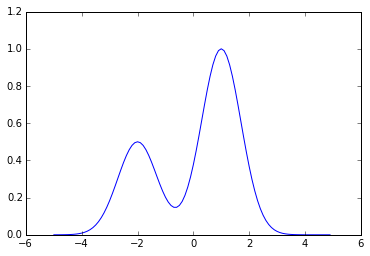

In [17]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))

if not(reset):
    samples = 50
    s = random.uniform(-5,5,samples)
    y = random.uniform(0,1.2,samples)

    for i in range(samples):
        if y[i]>f(s[i]):
            myfc="red"
        else:
            myfc="green"

        ax.add_patch(
            matplotlib.patches.Ellipse(
                (s[i], y[i]),               # (x,y)
                .2,                         # width
                .03,                        # height
                facecolor=myfc,
                edgecolor="none"
            )
        )
        clear_output(wait=True)
        display(fig)
        time.sleep(0.1)
    print "samples =", samples
    close()

In [18]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

However, you can see that this is highly inefficient, particularly as the number of dimensions go up, as most of your samples will be discarded.

# The Metropolis Algorithm

The idea is to generate the samples iteratively until you get a stable distribution of samples according to *f(x)*. Such iterative methods of generating samples from a distribution are called **Markov Chain Monte Carlo**.

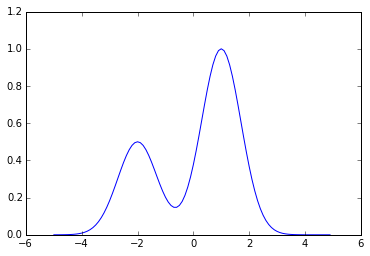

In [19]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))
            
samples = 100
s = random.uniform(-5,5,samples)
y = random.uniform(0,1,samples)
dots = []
myfc = []
myfcints = random.randint(0,255,(samples, 3))
for i in range(samples):
    myfc.append('#%02X%02X%02X' % (myfcints[i,0], myfcints[i,1], myfcints[i,2])) 

def genpatch(s):
    dots = []
    for i in range(samples):
        patch = matplotlib.patches.Ellipse(
            (s[i], y[i]*f(s[i])),       # (x,y)
            .2,                         # width
            .03,                        # height
            facecolor = myfc[i],
            edgecolor = "none"
        )
        dots.append(patch)
    return PatchCollection(dots, match_original=True)

def metropolis(s):
    delta = random.normal(0, 1, samples)
    s_new = s + delta
    for i in range(samples):
        if f(s_new[i]) < f(s[i]):
            if rand() < f(s_new[i]) / f(s[i]):
                s[i] = s_new[i]
        else:
            s[i] = s_new[i]
    return s

if not(reset):
    for i in range(5):
        p = genpatch(s)
        ax.add_collection(p)
        clear_output(wait=True)
        display(fig)
        time.sleep(2)
        for j in range(2):
            s = metropolis(s)
        p.remove()

    print "samples =", samples
    close()

In [20]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

# The Metropolis Algorithm Details


Each random initial sample $s$ has a distribution around it from which a new sample $s'$ is drawn, which is called the **proposal distribution**. If $f(s') > f(s)$, the new sample is kept and the old one discarded. If $f(s') < f(s)$, then the $s'$ is kept with a probability equal to $f(s') / f(s)$, and otherwise $s$ is kept.

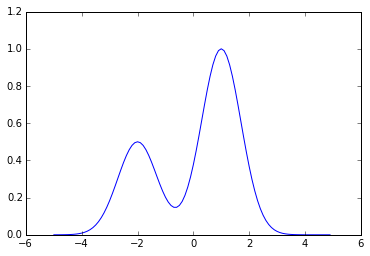

In [21]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))

if not(reset):
    samples = 1
    s = -1.0
    sigma = 1.0

    propdist = norm(loc=s, scale=sigma)
    p = matplotlib.patches.Ellipse(
        (s, f(s)),       # (x,y)
        .2,                         # width
        .03,                        # height
        facecolor = 'green',
        edgecolor = "none"
    )
    ax.add_patch(p)
    c1 = ax.plot(x, propdist.pdf(x), 'g')
    clear_output(wait=True)
    display(fig)
    time.sleep(2)

    for i in range(5):
        delta = random.normal(0, sigma, samples)
        s_new = s + delta
        p_new = matplotlib.patches.Rectangle(
            (s_new-.1, f(s_new)-0.02),          # (x,y)
            .2,                         # width
            .04,                        # height
            facecolor = 'red',
            edgecolor = "none"
        )

        ax.add_patch(p)
        ax.add_patch(p_new)
        clear_output(wait=True)
        display(fig)
        time.sleep(3)

        if f(s_new) < f(s):
            if rand() < f(s_new) / f(s):
                s = s_new
        else:
            s = s_new
            
        c1.pop(0).remove()
        p_new.remove()
        
        propdist = norm(loc=s, scale=sigma)
        p = matplotlib.patches.Ellipse(
            (s, f(s)),       # (x,y)
            .2,                         # width
            .03,                        # height
            facecolor = 'green',
            edgecolor = "none"
        )
        ax.add_patch(p)
        c1 = ax.plot(x, propdist.pdf(x), 'g')
        clear_output(wait=True)
        display(fig)
        time.sleep(3)

    close()

In [22]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

To obtain an intuition as to why this works, assume that the current sample is in a region where $f(x)$ has a monotone slope and assume the proposal distribution is narrow, so that only nearby samples are propsoed. Then, the probability of proposing a sample with a higher value of $f(x)$: $p(x'\mid f(x')>f(x))= 0.5$ and the probability of accepting that sample is 1.

Similarly, $p(x'\mid f(x')<f(x))= 0.5$ and the probability of accepting that sample is $f(x')/f(x)$

If I generate a number samples from the current sample point, the ratio of samples with $f(x')<f(x)$ over $f(x')>f(x)$ is exactly $f(x')/f(x)$.

I am doing this at all points of the distribution, so since the ratios are all correct, the full set of samples will represent the distribution correctly. With a little reflection you can probably convince yourself that the argument also holds if the current sample is at a local maximum or minimum of the function.

# Metropolis-Hastings
Hastings proposed in 1970 a modification of the Metropolis algorithm that is now commonly used. It allows for an assymetric proposal distribution, and corrects the acceptance probability when $f(s') < f(s)$ with the ratio of the areas of either side of the proposal distribution. Here we use for illustration the normal distribution with an offset, but in practice it allows smarter proposal distributions to be used.

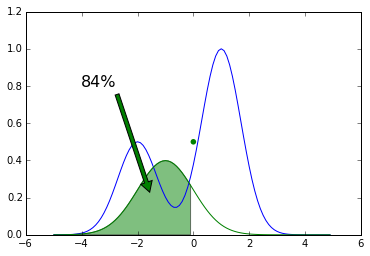

In [23]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x))

samples = 1
s = 0.0

propdist = norm(loc=s-1, scale=1)
p = matplotlib.patches.Ellipse(
    (s, 0.5),       # (x,y)
    .2,                         # width
    .03,                        # height
    facecolor = 'green',
    edgecolor = "none"
)
ax.add_patch(p)
c1 = ax.plot(x, propdist.pdf(x), 'g')
fillx = x[:x.size/2.0+1]
filly = propdist.pdf(fillx)
fillx[-1] = fillx[-2]
filly[-1] = 0
fill(fillx, filly, facecolor='g', alpha=0.5)
ax.annotate('84%', xy=(-1.5, .2), xytext=(-4, 0.8),
            arrowprops=dict(facecolor='g', shrink = 0.05), fontsize = 16
            )



display(fig)
close()


In [24]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

$p(x'\mid x'>x)= 0.16$ and $p(x'\mid x'>x)= 0.84$

So if $x'>x$, accept a sample with $f(x')<f(x)$ with probability: 

$$\frac{0.84 \times f(x')}{0.16 \times f(x)}$$

If $x'<x$, accept a sample with $f(x')<f(x)$ with probability: 

$$\frac{0.16 \times f(x')}{0.84 \times f(x)}$$

If $f(x')>f(x)$ always accept $x'$ as before.

In general, if the probability of proposing new sample $x'$ given a current sample $x$ for is given by $q(x'|x)$, then the acceptance probability of $x'$ under **Metropolis-Hastings** is given by:

$$\text{min}\left\{1,\frac{f(x')/q(x'|x)} {f(x)/q(x|x')}\right\} = \text{min}\left\{1,\frac{f(x')q(x|x')}{f(x)q(x'|x)}\right\} $$

# Gibbs sampling

If $x$ is a vector with more than one element, instead of sampling from the full joint distribution using an appropriate proposal distribution, it can be simpler to sample from the marginal distribution of each element in turn. This is called **Gibbs sampling**.

In this case $x'$ is identical to $x$ except for its value along the $i^\text{th}$ dimension, which is sampled from the conditional distribution $p(x_i|x_{-i})$ where $x_{-i} = \{x_1, ..., x_{i-1}, x_{i+1}, ..., x_n\}$. This leads to the proposal of $x'$ always being accepted, because:

$$ \begin{align*}
\frac{p(x')}{p(x)}\frac{q(x|x')}{q(x'|x)} 
&= \frac{p(x'_i|x'_{-i})p(x'_{-i})}{p(x_i|x_{-i})p(x_{-i})}\frac{p(x_i|x'_{-i})}{p(x'_i|x_{-i})}\\
&= \frac{p(x'_i|x_{-i})p(x_{-i})}{p(x_i|x_{-i})p(x_{-i})}\frac{p(x_i|x_{-i})}{p(x'_i|x_{-i})} = 1
\end{align*} $$

since $x'_{-i} = x_{-i}$.

# So why do we care?

**Inference from data!**

Say we have a time series of text messages by a user as shown below. 
<div style="font-size: 100%;">(Example and some of the text taken from the excellent iPython notebook <a href="http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/" Bayesian Methods for Hackers>Bayesian Methods for Hackers</a> by Cam Davidson-Pilon)</div>

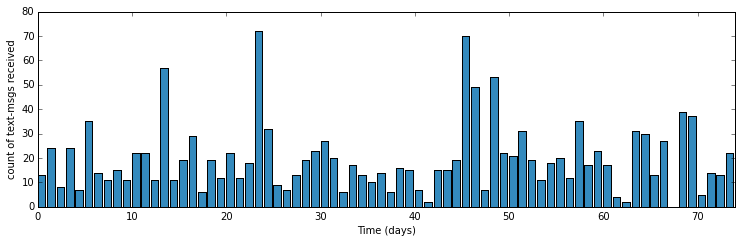

In [25]:
fig = figure()
fig.set_size_inches(12.5,3.5)
count_data = np.loadtxt("txtdata.csv")
n_count_data = len(count_data)
bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.xlim(0, n_count_data);
display(fig)
close()


In [26]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

Looking at this, we suspect that there might be a higher rate of texting in the second part of the series. To quantify this, we should infer the rate in the first part of the series, and the rate in the second part of the series, as well as the point of change. If the two rates come out nearly the same, we would be uncertain that there was an actual change.

How can we start to model this? This type of count data is typically modelled as a Poisson process. Denoting day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poisson}(\lambda)$$  

with

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$



# Baysian Inference

The joint probability for a set of observations $O$ and the underlying variables of a model $V$ is given by:

$$ P( V , O ) = P( V | O ) P(O) = P(O | V) P(V) $$

Or, we can write this as **"Bayes' Rule"**:

$$ P( V | O ) = \frac{ P(O | V) P(V) } {P(O) } \propto P(O | V) P(V)$$

So in order to work out the likely values of the variables in our model, we can use the model on the previous slide determine $P(O | V)$ but we will also need to assign prior distributions to each of our variables. Typically the full distribution of possible observations is unknown, but we don't need this for MCMC.

Using MCMC we can sample variables from their assumed prior distributions. Next we can propagate these samples according to appropriate proposal distributions, and calculate the likelihood of these variables given the observations and use these to decide to keep or discard the new samples (variables) according to the Metropolis-Hastings algorithm. Luckily there are tools, such as PyMC in Python, that not only take care of the sampling for us, but also automatically pick the most appropriate proposal distribution.

# Hyperparameters

So, what would be good prior probability distributions for $\lambda_1$ and $\lambda_2$?  $\lambda$ can be any positive number and the *exponential* distribution provides a continuous density function for positive numbers and might be a good choice for modelling $\lambda_i$. But the exponential distribution takes a parameter of its own, so we'll need to include that parameter in our model. Let's call that parameter $\alpha$.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ is called a **hyper-parameter** or **parent variable**. In literal terms, it is a parameter that influences other parameters. 

Our initial guess at $\alpha$ does not influence the model too strongly, so we have some flexibility in our choice. Since we're modelling $\lambda$ using an exponential distribution, we can use the expected value:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

What about $\tau$? Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a *uniform prior belief* to every possible day. This is equivalent to saying:

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau_i ) = \frac{1}{70}
\end{align}

# ... and what do we get?
(*Here you really should have a look at the code by clicking the "toggle code" link below. Unfortunately it will shift your position in the notebook and you'll have to scroll down to find your current position again. The main point will be to see how straightforward it is to define the distributions as we discussed above in the previous three sections. *)

You will need to have the **pymc** package installed to run the code below. If you do, you can replace the exponential prior for $\lambda$ with a uniform one, by commenting out the definitions of $\lambda_1$ and $\lambda_2$ and uncommenting the ones below it in the code. You will notice that it makes very little difference in the estimates for the model parameters.

In [27]:
import pymc as pm
# reset these pymc objects
%reset_selective -f lambda_[1-2]
%reset_selective -f tau
%reset_selective -f model

alpha = 1.0/count_data.mean()  # Count_data is the variable that holds our txt counts
                               
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

#you can try a unifor prior too:
#lambda_1 = pm.Uniform("lambda_1", lower=0, upper=count_data.max())
#lambda_2 = pm.Uniform("lambda_2", lower=0, upper=count_data.max())

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

 [-----------------100%-----------------] 40000 of 40000 complete in 4.4 sec

In [28]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

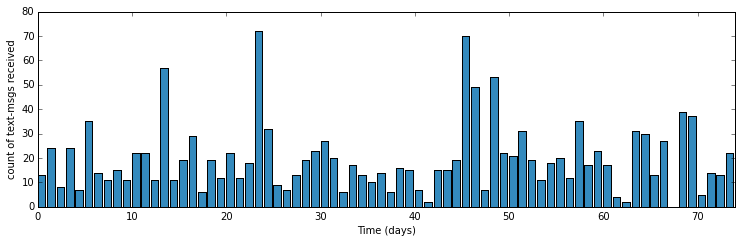

In [29]:
display(fig)

In [30]:
def hdi_of_mcmc( sample_vec, cred_mass = 0.95 ):
    assert len(sample_vec), 'need points to find HDI'
    sorted_pts = np.sort( sample_vec )

    ci_idx_inc = int(np.floor( cred_mass*len(sorted_pts) ))
    n_cis = len(sorted_pts) - ci_idx_inc
    ci_width = sorted_pts[ci_idx_inc:] - sorted_pts[:n_cis]

    min_idx = np.argmin(ci_width)
    hdi_min = sorted_pts[min_idx]
    hdi_max = sorted_pts[min_idx+ci_idx_inc]
    return hdi_min, hdi_max
    

def plot_hdi(ax, hdi):        # plot HDI
    hdi_min = hdi[0]
    hdi_max = hdi[1]
    hdi_line, = ax.plot( [hdi_min, hdi_max], [0,0],
                         lw=5.0, color='k')
    hdi_line.set_clip_on(False)
    ax.text( hdi_min, -0.04, '%.3g'%hdi_min,
             #transform=trans,
             horizontalalignment='center',
             verticalalignment='top',
             color = 'r',
             )
    ax.text( hdi_max, -0.04, '%.3g'%hdi_max,
             #transform=trans,
             horizontalalignment='center',
             verticalalignment='top',
             color = 'r',
             )

    ax.text( (hdi_min+hdi_max)/2, 0.08, '95% HDI',
             #transform=trans,
             horizontalalignment='center',
             verticalalignment='bottom',
             )


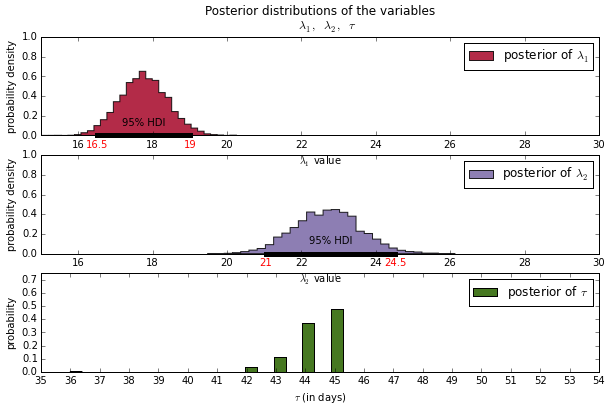

In [31]:
fig = figure()
fig.set_size_inches(10,6)

#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plot_hdi(ax, hdi_of_mcmc(lambda_1_samples))
plt.legend(loc="upper right")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")
plt.ylabel("probability density");

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plot_hdi(ax, hdi_of_mcmc(lambda_2_samples))
plt.legend(loc="upper right")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")
plt.ylabel("probability density");

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2., width=0.4)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper right")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

In [32]:
HTML('''<div style="text-align: right;font-size:50%">
<a href="javascript:code_toggle()">toggle code</a></div>''')

# Or are there three sections?

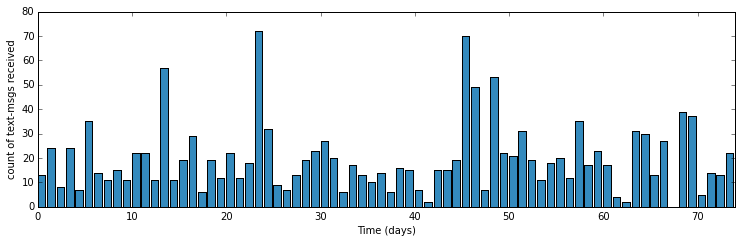

In [33]:
fig = figure()
fig.set_size_inches(12.5,3.5)

count_data = np.loadtxt("txtdata.csv")
n_count_data = len(count_data)
bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.xlim(0, n_count_data);

(Note, the code below doesn't always give reasonable answers. You could have the two switch points really close to each other, which would not give you enough data for one of the distributions. But running the MCMC cell below followed by the plotting code a few times usually works.)

In [37]:
# reset the pymc objects
%reset_selective -f lambda_[1-3]
%reset_selective -f tau_[1-2]
%reset_selective -f model

alpha = 1.0/count_data.mean()  # Recall count_data is the
                               # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
lambda_3 = pm.Exponential("lambda_3", alpha)


#lambda_1 = pm.Uniform("lambda_1", lower=0, upper=count_data.max())
#lambda_2 = pm.Uniform("lambda_2", lower=0, upper=count_data.max())

tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data-1)
tau_2 = pm.DiscreteUniform("tau_2", lower=tau_1, upper=n_count_data)

@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2, lambda_1=lambda_1, lambda_2=lambda_2, lambda_3=lambda_3):
    out = np.zeros(n_count_data)
    out[:tau_1] = lambda_1  # lambda before tau is lambda1
    out[tau_1:tau_2] = lambda_2  # lambda after (and including) tau is lambda2
    out[tau_2:] = lambda_3
    return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
lambda_3_samples = mcmc.trace('lambda_3')[:]
tau_1_samples = mcmc.trace('tau_1')[:]
tau_2_samples = mcmc.trace('tau_2')[:]

 [-----------------100%-----------------] 40000 of 40000 complete in 7.2 sec

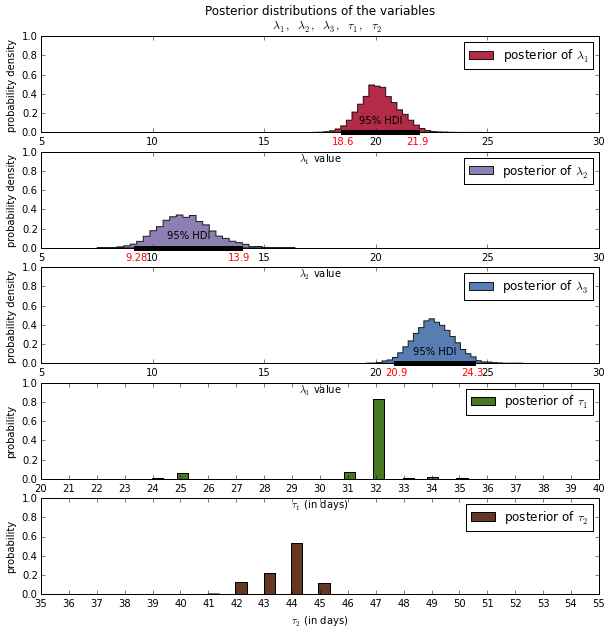

In [38]:
fig = figure()
fig.set_size_inches(10,10)

#histogram of the samples:

ax = plt.subplot(511)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plot_hdi(ax, hdi_of_mcmc(lambda_1_samples))
plt.legend(loc="upper right")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\lambda_3,\;\tau_1,\;\tau_2$""")
plt.xlim([5, 30])
plt.xlabel("$\lambda_1$ value")
plt.ylabel("probability density");

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plot_hdi(ax, hdi_of_mcmc(lambda_2_samples))
plt.legend(loc="upper right")
plt.xlim([5, 30])
plt.xlabel("$\lambda_2$ value")
plt.ylabel("probability density");

ax = plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(lambda_3_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_3$", color="#3A68A6", normed=True)
plot_hdi(ax, hdi_of_mcmc(lambda_3_samples))
plt.legend(loc="upper right")
plt.xlim([5, 30])
plt.xlabel("$\lambda_3$ value")
plt.ylabel("probability density");

plt.subplot(514)
w = 1.0 / tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau_1$",
         color="#467821", weights=w, rwidth=2., width = 0.4)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper right")
plt.ylim([0, 1])
plt.xlim([20, 40])
plt.xlabel(r"$\tau_1$ (in days)")
plt.ylabel("probability");

plt.subplot(515)
w = 1.0 / tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau_2$",
         color="#663821", weights=w, rwidth=2., width = 0.4)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper right")
plt.ylim([0, 1])
plt.xlim([35, 55])
plt.xlabel(r"$\tau_2$ (in days)")
plt.ylabel("probability");

# (Nonlinear) Dynamical Systems

The previous slides have all been about estimating static distributions (and integrals). Now consider the following system, which is a **Hidden Markov Model**:

<center><img src='HMM.png', width=80%></center>

(This notebook was written after reading O. Cappe, S. J. Godsill, and E. Moulines, “An Overview of Existing Methods and Recent Advances in Sequential Monte Carlo,” *Proceedings of the IEEE*, vol. 95, no. 5, pp. 899–924, May 2007. The figure above is a copy of their Figure 1 and used here for educational purposes.)

# Bayesian Recursion

The joint probability distribution of the state variables over time $t$ according to Bayes' Rule is given by the recursion:

$$\begin{align*}
 P_{0:t}( x_{0:t} | y_{0:t} ) &\propto P(y_t | x_t)\; P(x_{0:t}|y_{0:t-1}) \\
 &\propto g(y_t | x_t)\; f(x_t|x_{t-1})\; P(x_{0:t-1}|y_{0:t-1})
\end{align*}$$

If, given a state $x_t$ we know the transition probability $f(x_{t+1}|x_{t})$ and the observation probability $g(y_t|x_t)$, we can iterate through this recursion if we can generate samples distributed according to $P(x_{0:t-1}|y_{0:t-1})$. This is not always possible, so we can repeatedly apply the same trick as in **importance sampling**. This is then called **sequential importance sampling**.

# Sequential Importance Sampling

For this we generate samples from a conveniently chosen proposal distribution $Q(x_{0:t}|y_{0:t})$ and then calculate the unnormalised importance weights according to:

$$\tilde{w}_t^{(i)} = P(x_{0:t}^{(i)}|y_{0:t})/Q(x_{0:t}^{(i)}|y_{0:t})$$

which can be normalised by dividing by $\sum_i\,\tilde{w}_t^{(i)}$ when needed.

The trick is to choose the importance distribution such that it factorises in a form similar to that of the target posterior distribution:

$$Q(x_{0:t}|y_{0:t}) = Q(x_{0:t-1}|y_{0:t-1})Q(x_t|x_{t-1},y_t)$$

The weights then take the form:

$$\begin{align*}
\tilde{w}_t^{(i)} &= P(x_{0:t}^{(i)}|y_{0:t})/Q(x_{0:t}^{(i)}|y_{0:t})\\
&\propto \tilde{w}_{t-1}^{(i)} \times \frac{g(y_t | x_t)\; f(x_t|x_{t-1})}{Q(x_t|x_{t-1},y_t)}
\end{align*}$$

# ... but it doesn't really work!

While sequential importance sampling works for short runs, it fails for longer runs due to an effect known as weight **degeneracy**, meaning that a small proportion of them contain nearly all of the probability mass and most particles contribute nothing significant to the estimates.

Part of the problem is that we are estimating $ P_{0:t}( x_{0:t} | y_{0:t} )$, i.e., the joint distribution at all times, so that each observation the number of dimensions grows by the number of state variables. This is bound to fail as we ultimately won't have enough information.

In practice we will often be interested in much lower dimensional marginals, such as the **filtering distribution** $ P_t( x_t | y_{0:t} )$ or the **predictive distribution** $ P_t( x_{t+1} | y_{0:t} )$.

# Particle Filtering

If we are only interested in the filtering distribution, we can avoid weight degeneracy by regular resampling of all the particles, to give them all equal weight again. This is done by sampling with replacement from the set of particles, where the probability of picking each particle is proportional to its weight. This is called **Particle Filtering** or **Sequential Importance Resampling**.

Resampling can be done at each time step, or only after a certain number of steps.

More advanced resampling schemes aim to keep only particles that are likely to survive at future time steps. This technique is called **auxiliary sampling**.

In [36]:
reset = False  #show animations when cells are run.